### 1. Configuration and load

In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading with error handling
try:
    df = pd.read_csv('../data/raw/customer_support_tickets.csv')
    print("Dataset loaded successfully.")
    print(f'Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns')
except FileNotFoundError:
    print("Error: The dataset file was not found.")

Dataset loaded successfully.
Dataset dimensions: 8469 rows and 17 columns


### 2. Data exploration

In [2]:
# 1. General information about the dataset and data types
print("\n" + "="*50)
print("📊 Basic information about the dataset")
print("="*50 + "\n")
df.info()

# 2. Check for missing values
print("\n" + "="*50)
print("❓ Missing values in each column")
print("="*50 + "\n")
missing_values = df.isnull().sum()
print(missing_values)

# 3. Check for duplicates
print("\n" + "="*50)
print("🔍 Checking for duplicate rows")
print("="*50 + "\n")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


📊 Basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority       

In [3]:
# 4. Text length analysis 
print("\n" + "="*50)
print("📏 Text length analysis")
print("="*50 + "\n")

# Analyze Subject and Description
df['subject_length'] = df['Ticket Subject'].str.len()
df['description_length'] = df['Ticket Description'].str.len()
df['subject_words'] = df['Ticket Subject'].str.split().str.len()
df['description_words'] = df['Ticket Description'].str.split().str.len()

print("Subject Statistics:")
print(f"  - Min length: {df['subject_length'].min()} | Max: {df['subject_length'].max()}")
print(f"  - Mean length: {df['subject_length'].mean():.2f} | Median: {df['subject_length'].median():.2f}")
print(f"  - Mean words: {df['subject_words'].mean():.2f}")

print("\nDescription Statistics:")
print(f"  - Min length: {df['description_length'].min()} | Max: {df['description_length'].max()}")
print(f"  - Mean length: {df['description_length'].mean():.2f} | Median: {df['description_length'].median():.2f}")
print(f"  - Mean words: {df['description_words'].mean():.2f}")


📏 Text length analysis

Subject Statistics:
  - Min length: 9 | Max: 24
  - Mean length: 15.72 | Median: 14.00
  - Mean words: 2.00

Description Statistics:
  - Min length: 151 | Max: 397
  - Mean length: 292.34 | Median: 301.00
  - Mean words: 46.47


In [4]:
# 5. Target variable distribution (Ticket Type - Classification target)
print("\n" + "="*50)
print("🎯 Target variable distribution (Ticket Type)")
print("="*50 + "\n")

ticket_type_dist = df['Ticket Type'].value_counts()
print(ticket_type_dist)
print(f"\nTotal classes: {len(ticket_type_dist)}")
print(f"Class balance ratio: {ticket_type_dist.max() / ticket_type_dist.min():.2f}x")


🎯 Target variable distribution (Ticket Type)

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

Total classes: 5
Class balance ratio: 1.07x


In [5]:
# 6. Special characters and patterns in text
print("\n" + "="*50)
print("🔤 Special characters and patterns analysis")
print("="*50 + "\n")

# Check for special characters
df['has_numbers'] = df['Ticket Description'].str.contains(r'\d', regex=True)
df['has_special_chars'] = df['Ticket Description'].str.contains(r'[!@#$%^&*(),.?":{}|<>]', regex=True)
df['has_urls'] = df['Ticket Description'].str.contains(r'http|www', regex=True)

# Summary of special character analysis
print(f"Texts with numbers: {df['has_numbers'].sum()} ({df['has_numbers'].sum()/len(df)*100:.2f}%)")
print(f"Texts with special characters: {df['has_special_chars'].sum()} ({df['has_special_chars'].sum()/len(df)*100:.2f}%)")
print(f"Texts with URLs: {df['has_urls'].sum()} ({df['has_urls'].sum()/len(df)*100:.2f}%)")


🔤 Special characters and patterns analysis

Texts with numbers: 2125 (25.09%)
Texts with special characters: 8469 (100.00%)
Texts with URLs: 257 (3.03%)


In [6]:
# 7. Text samples from each ticket type
print("\n" + "="*50)
print("📝 Sample texts from each Ticket Type")
print("="*50 + "\n")

for ticket_type in df['Ticket Type'].unique():
    sample = df[df['Ticket Type'] == ticket_type]['Ticket Description'].iloc[0]
    print(f"\n--- {ticket_type} ---")
    print(f"Sample: {sample[:150]}...")  # First 150 characters


📝 Sample texts from each Ticket Type


--- Technical issue ---
Sample: I'm having an issue with the {product_purchased}. Please assist.

Your billing zip code is: 71701.

We appreciate that you have requested a websit...

--- Billing inquiry ---
Sample: I'm having an issue with the {product_purchased}. Please assist.

If you have a problem you're interested in and I'd love to see this happen, please...

--- Cancellation request ---
Sample: I'm facing a problem with my {product_purchased}. The {product_purchased} is not turning on. It was working fine until yesterday, but now it doesn't r...

--- Product inquiry ---
Sample: I'm unable to access my {product_purchased} account. It keeps displaying an 'Invalid Credentials' error, even though I'm using the correct login infor...

--- Refund request ---
Sample: I'm having an issue with the {product_purchased}. Please assist. (Thanks) I will contact all my suppliers and confirm.

Please try and find out whet...



📊 Creating visualizations



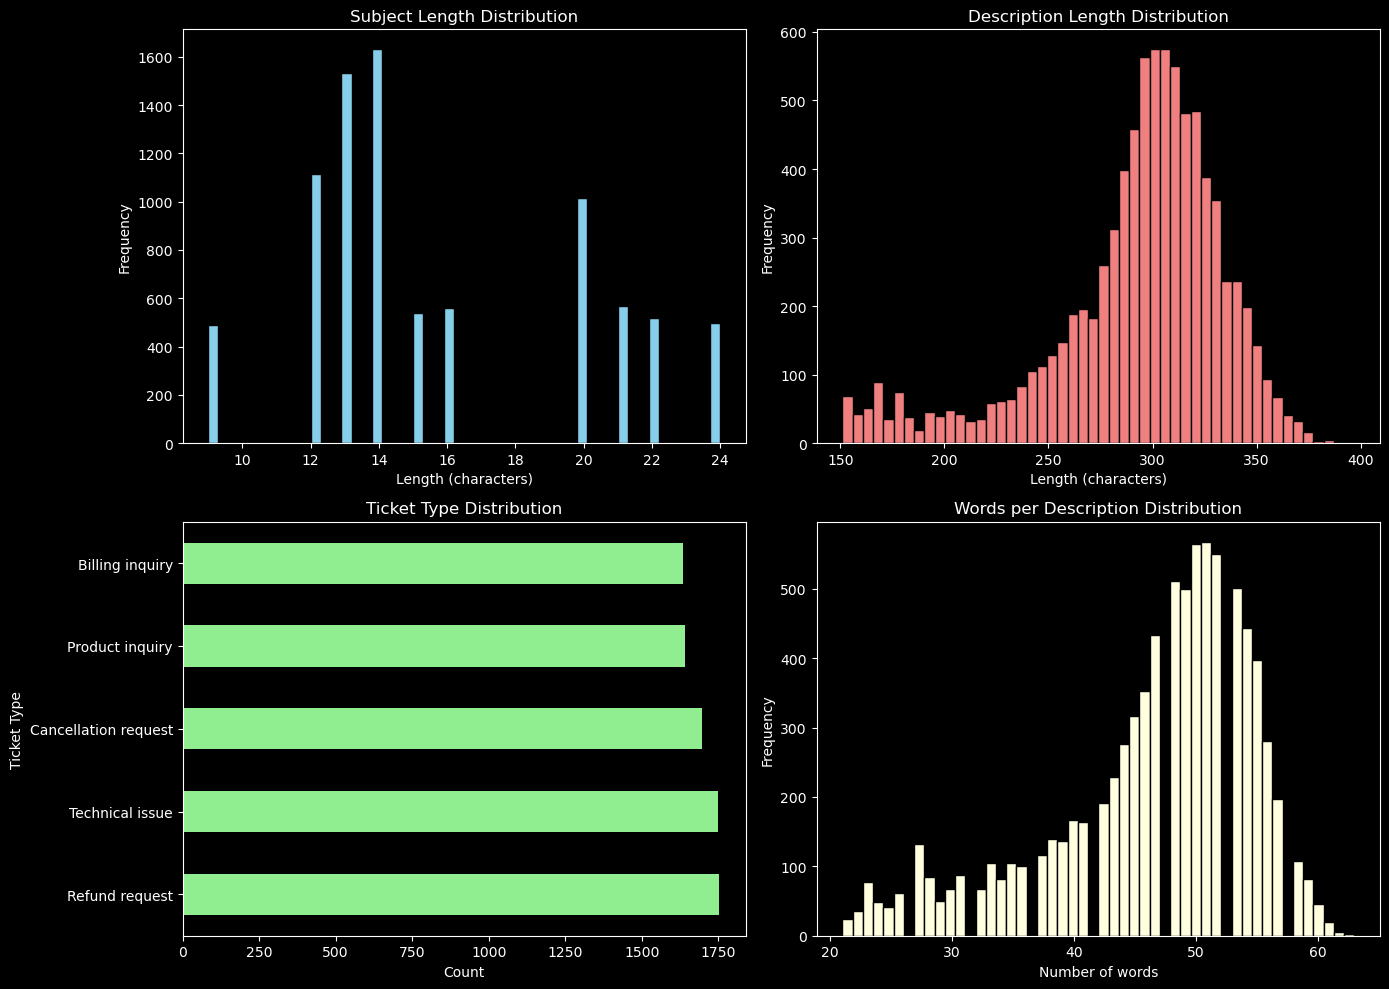


CROSS-ANALYSIS: Description Length by Ticket Type



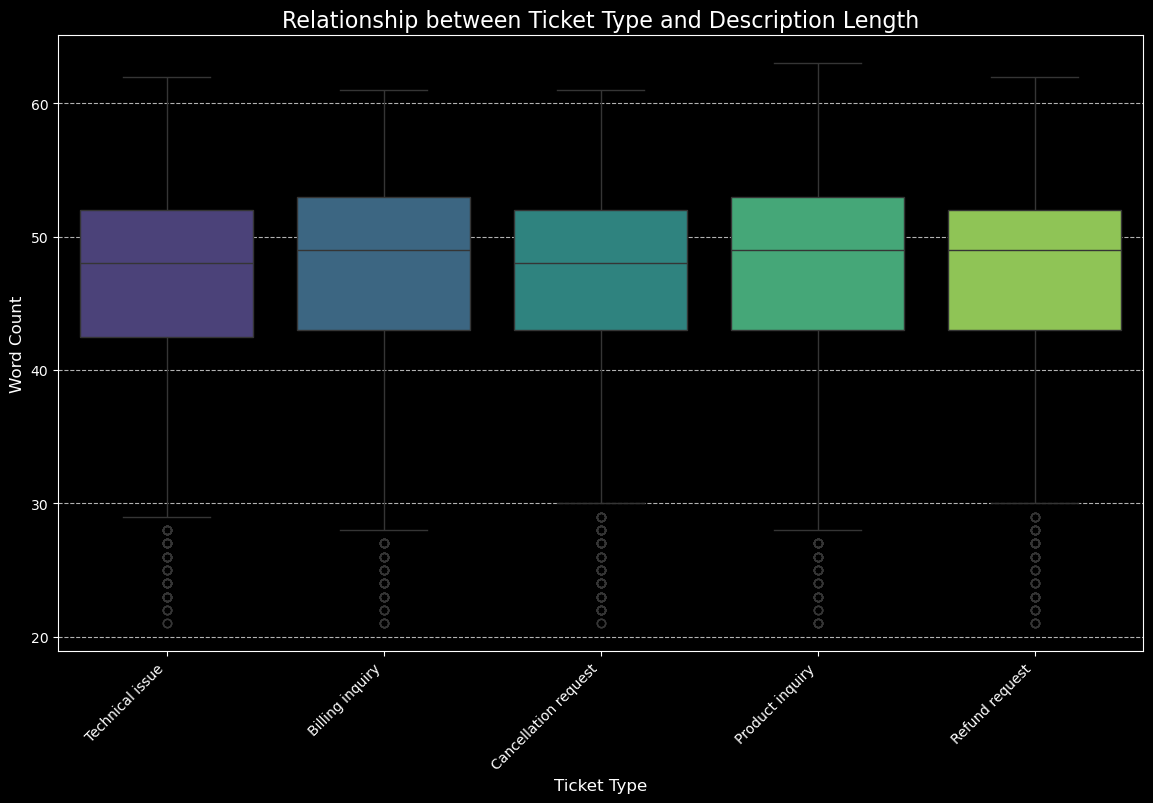


📈 Average word count by Ticket Type:


Ticket Type
Product inquiry         46.720293
Billing inquiry         46.608935
Refund request          46.594749
Technical issue         46.249571
Cancellation request    46.178761
Name: description_words, dtype: float64

✅ Visualizations created successfully


In [7]:
# 8. Visualizations for text data distribution
print("\n" + "="*50)
print("📊 Creating visualizations")
print("="*50 + "\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Text length distribution
axes[0, 0].hist(df['subject_length'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Subject Length Distribution')
axes[0, 0].set_xlabel('Length (characters)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['description_length'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Description Length Distribution')
axes[0, 1].set_xlabel('Length (characters)')
axes[0, 1].set_ylabel('Frequency')

# Ticket Type distribution
ticket_type_dist.plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Ticket Type Distribution')
axes[1, 0].set_xlabel('Count')

# Words per description
axes[1, 1].hist(df['description_words'], bins=50, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('Words per Description Distribution')
axes[1, 1].set_xlabel('Number of words')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Cross-analysis (Length vs Category)
print("\n" + "="*50)
print("CROSS-ANALYSIS: Description Length by Ticket Type")
print("="*50 + "\n")

# Canvas setup
plt.figure(figsize=(14, 8))

# THE CROSS-ANALYSIS PLOT:
sns.boxplot(
    data=df, 
    x='Ticket Type', 
    y='description_words', 
    hue='Ticket Type',      # Assigning the x variable to hue
    palette='viridis', 
    legend=False            # Hiding the legend as it's redundant with the x-axis
)

# Aesthetic adjustments
plt.title('Relationship between Ticket Type and Description Length', fontsize=16)
plt.xlabel('Ticket Type', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# --- NUMERICAL VALIDATION ---
# Calculate exact mean to support the visual insight
print("\n📈 Average word count by Ticket Type:")
display(df.groupby('Ticket Type')['description_words'].mean().sort_values(ascending=False))

print("✅ Visualizations created successfully")

**💡 How to interpret this visualization?**

Boxes higher than others:

Example: If the "Technical Issue" box is much higher than "Password Reset," it means that technical problems require longer explanations.

Business conclusion: The model will need more processing power for technical tickets.

Very tall boxes (vertically stretched):

It means there is a lot of variance. Some users write 3 words and others 1000 for the same problem. This usually confuses simple models.

Points outside the "whiskers" (Outliers):

Those black points at the very top are anomalies. If you see too many, confirm that your strategy of "truncating" very long texts is necessary.